In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import statistics
import math

In [2]:
df = pd.read_csv(r"C:\Users\sk062\Documents\Data\Google Search\Search.csv")
Data = pd.DataFrame(df)
Data["Data"] = pd.to_datetime(Data["Data"])
# 'month' 列を作成
Data['month'] = Data['Data'].dt.month
# 'date' 列を作成
Data['day'] = Data['Data'].dt.day
# 'week_number' 列を作成
Data["week_number"] = Data["Data"].dt.isocalendar().week

In [15]:
Data_Check = Data.drop(["Data","month","day","week_number"],axis=1)
Data_Check.head()

,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
0,43,22,62,6
1,47,22,65,4
2,51,26,100,3
3,44,20,74,4
4,41,23,68,4


In [16]:
Data_Check.describe()

,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
count,262.000000,262.000000,262.000000,262.000000
mean,48.667939,30.637405,44.835878,7.522901
std,9.574493,8.460536,13.273998,5.787873
min,19.000000,15.000000,22.000000,2.000000
25%,43.000000,23.250000,34.250000,4.000000
50%,48.000000,30.500000,43.000000,6.000000
75%,53.000000,37.000000,52.000000,8.000000
max,94.000000,60.000000,100.000000,32.000000


In [17]:
print("AIRJORDANの検索数の最頻値",statistics.mode( Data["AIR JORDAN"] ))
print("AIRFORCEの検索数の最頻値",statistics.mode( Data["AIR FORCE"] ))
print("AIRMAXの検索数の最頻値",statistics.mode( Data["AIR MAX"] ))
print("DUNKの検索数の最頻値",statistics.mode( Data["DUNK"] ))

AIRJORDANの検索数の最頻値 43
AIRFORCEの検索数の最頻値 39
AIRMAXの検索数の最頻値 46
DUNKの検索数の最頻値 6


In [20]:
bins = [0,10,20,30,40,50,60,70,80,90,100]

# 各カラムの度数分布を計算
freq_tables = {}
for col in Data_Check.columns:
    freq = pd.cut(Data_Check[col], bins=bins).value_counts().sort_index()
    freq_tables[col] = freq

# 結果をデータフレームにまとめる
freq_df = pd.DataFrame(freq_tables)
freq_df.index = [f"{interval.left}~{interval.right}" for interval in freq_df.index]

# 度数分布表の出力
print("度数分布表")
freq_df

度数分布表


,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
0~10,0,0,0,213
10~20,1,38,0,35
20~30,5,93,34,13
30~40,28,103,78,1
40~50,129,25,75,0
50~60,70,3,38,0
60~70,21,0,28,0
70~80,7,0,7,0
80~90,0,0,0,0
90~100,1,0,2,0


各スニーカーの検索数のヒストグラム


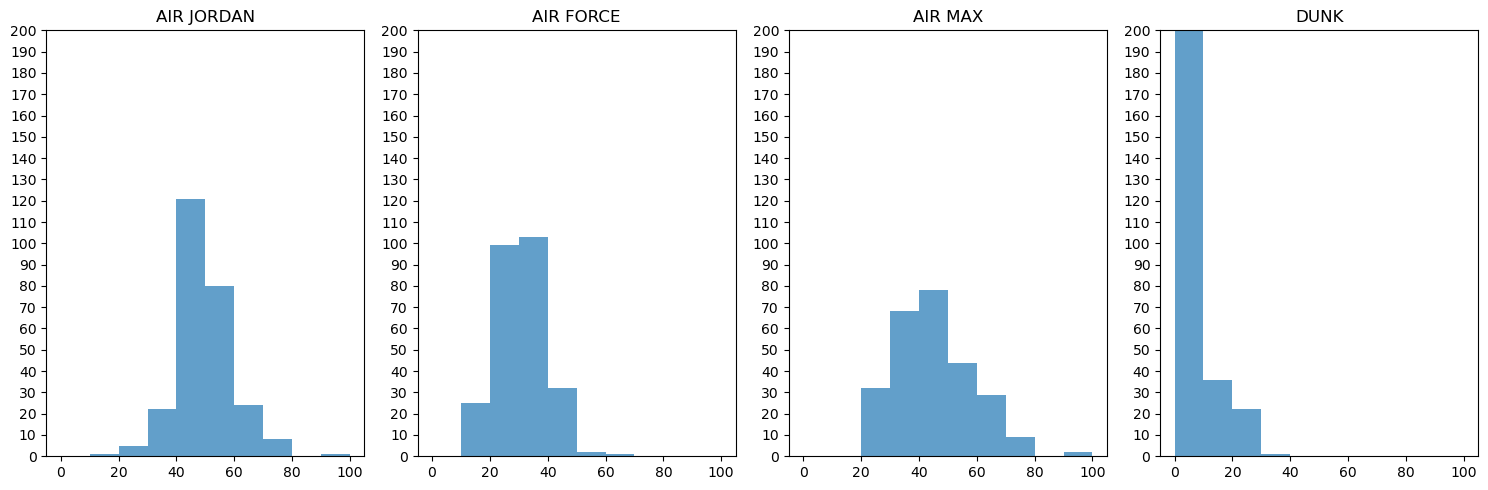

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, col in enumerate(Data_Check.columns):
    ax = axes[i]
    df[col].hist(bins=bins, ax=ax, alpha=0.7, grid=False)
    ax.set_ylim(0, 200)
    ax.set_yticks(range(0, 201, 10))
    ax.set_title(col)

plt.tight_layout()

print("各スニーカーの検索数のヒストグラム")
plt.show()
